In [146]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from scipy import integrate
from IPython.display import HTML

In [147]:
#Definimos las constantes
G= 6.67e-11
mT= 5.9736e24
rT=6.3781e6
mL= 0.07349e24
rL= 1.7374e6
d= 3.844e8
v0_=11096/d
#Para tierra estática y la luna en orbita circular
w= 2.6617e-6
mN=1
tetha=np.pi/4
phi0=np.radians(25.76)
r0=((rT/d),(phi0))
pr_0=v0_*np.cos(tetha-phi0)
pphi_0=r0[0]*v0_*np.sin(tetha-phi0)
print(v0_)




2.886576482830385e-05


In [148]:

class Orbitante:

    def __init__(self,r0,t,p0,l0,dinamica):
        self.dinamica=dinamica
        self.t = t
        self.dt = t[1] - t[0]

        self.r=np.zeros(2)
        self.p=np.zeros(2)

        self.r[0]=r0[0]
        self.r[1]=r0[1]
        self.p[0]=p0
        self.p[1]=l0


        self.R = np.zeros((len(t),len(self.r)))
        self.P = np.zeros_like(self.R)


    def Evolution(self,i):

        self.SetPosition(i)
        self.SetMomentum(i)

        if self.dinamica:



            K1 = np.zeros(4)
            K2 = np.zeros(4)
            K3 = np.zeros(4)
            K4 = np.zeros(4)

            K1[0] = self.f0(self.p[0])
            K1[1] = self.f1(self.r[0],self.p[1])
            K1[2] = self.f2(self.r[0], self.r[1], self.p[1],t[i-1])
            K1[3] = self.f3(self.r[0],self.r[1],self.t[i])



            K2[0] = self.f0(self.p[0]+0.5*self.dt*K1[2])
            K2[1] = self.f1(self.r[0]+0.5*self.dt*K1[0],self.p[1]+0.5*self.dt*K1[3])
            K2[2] = self.f2(self.r[0]+0.5*self.dt*K1[0],self.r[1]+0.5*self.dt*K1[1],self.p[1]+0.5*self.dt*K1[3],self.t[i]+0.5*self.dt)
            K2[3] = self.f3(self.r[0]+0.5*self.dt*K1[0],self.r[1]+0.5*self.dt*K1[1],self.t[i]+0.5*self.dt)

            K3[0] = self.f0(self.p[0]+0.5*self.dt*K2[2])
            K3[1] = self.f1(self.r[0]+0.5*self.dt*K2[0],self.p[1]+0.5*self.dt*K2[3])
            K3[2] = self.f2(self.r[0]+0.5*self.dt*K2[0],self.r[1]+0.5*self.dt*K2[1],self.p[1]+0.5*self.dt*K2[3],self.t[i]+0.5*self.dt)
            K3[3] = self.f3(self.r[0]+0.5*self.dt*K2[0],self.r[1]+0.5*self.dt*K2[1],self.t[i]+0.5*self.dt)

            K4[0] = self.f0(self.p[0]+self.dt*K3[2])
            K4[1] = self.f1(self.r[0]+self.dt*K3[0],self.p[1]+self.dt*K3[3])
            K4[2] = self.f2(self.r[0]+self.dt*K3[0],self.r[1]+self.dt*K3[1],self.p[1]+self.dt*K3[3],self.t[i]+self.dt)
            K4[3] = self.f3(self.r[0]+self.dt*K3[0],self.r[1]+self.dt*K3[1],self.t[i]+self.dt)


            self.r[0]=self.r[0] +(self.dt/6)*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
            self.r[1]=self.r[1] +(self.dt/6)*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
            self.p[0]=self.p[0] +(self.dt/6)*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
            self.p[1]=self.p[1] +(self.dt/6)*(K1[3]+2*K2[3]+2*K3[3]+K4[3])


        else:
            self.r[1]= self.r[1] + self.p[1]*self.dt


    def SetPosition(self,i):
        self.R[i] = self.r

    def SetMomentum(self,i):
        self.P[i] = self.p




    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetMomentum(self,scale=1):
        return self.P[::scale]


    def f0(self,pr_):
        return pr_

    def f1(self,r_,pphi_):
        return pphi_/(r_**2)

    def f2(self,r_,phi,pphi_,t):

        u= np.sqrt(1+r_**2 -2*r_*np.cos(phi-w*t))
        mu= mL/mT
        delta= (G*mT)/(d**3)
        return (pphi_**2)/(r_**3) -delta*((1/r_**2) + (mu/u**3)*(r_-np.cos(phi-w*t)))


    def f3(self,r_,phi,t):
        u= np.sqrt(1+r_**2 -2*r_*np.cos(phi-w*t))
        mu= mL/mT
        delta= (G*mT)/(d**3)
        return  -(delta*mu*r_)/(u**3) * np.sin(phi-w*t)



"""
class Orbitante:

    def __init__(self,r0,t,p0,l0,dinamica):


        self.dinamica=dinamica
        self.t = t
        self.dt = t[1] - t[0]

        self.r=np.zeros(3)

        self.r[0]=r0
        self.p=p0


        if self.dinamica:
            self.l=l0
            self.fr= np.zeros(3)
            self.fphi= np.zeros(3)


        self.R = np.zeros((len(t),len(self.r)))
        self.P = np.zeros_like(self.R)
        self.L = np.zeros(self.R)
        self.Fr = np.zeros_like(self.R)
        self.Fphi = np.zeros(self.R)


    def SetPosition(self,i):
        self.R[i] = self.r

    def SetMomentum(self,i):
        self.P[i] = self.p

    def SetAngularMomentum(self,i):
        self.L[i] = self.l

    def SetRadForce(self,i):
        self.Fr[i] = self.fr

    def SetAngForce(self,i):
        self.Fphi[i] = self.fphi


    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetMomentum(self,scale=1):
        return self.P[::scale]

    def GetAngularMomentum(self,scale=1):
        return self.L[::scale]

    def GetRadForce(self,scale=1):
        return self.Fr[::scale]

    def GetAngForce(self,scale=1):
        return self.Fphi[::scale]

"""



'\nclass Orbitante:\n\n    def __init__(self,r0,t,p0,l0,dinamica):\n\n        \n        self.dinamica=dinamica\n        self.t = t\n        self.dt = t[1] - t[0] \n\n        self.r=np.zeros(3)\n\n        self.r[0]=r0\n        self.p=p0\n\n\n        if self.dinamica:        \n            self.l=l0\n            self.fr= np.zeros(3)\n            self.fphi= np.zeros(3)\n\n        \n        self.R = np.zeros((len(t),len(self.r)))\n        self.P = np.zeros_like(self.R)\n        self.L = np.zeros(self.R)\n        self.Fr = np.zeros_like(self.R)\n        self.Fphi = np.zeros(self.R)\n\n\n    def SetPosition(self,i):\n        self.R[i] = self.r\n        \n    def SetMomentum(self,i):\n        self.P[i] = self.p\n\n    def SetAngularMomentum(self,i):\n        self.L[i] = self.l\n        \n    def SetRadForce(self,i):\n        self.Fr[i] = self.fr\n\n    def SetAngForce(self,i):\n        self.Fphi[i] = self.fphi\n\n    \n    def GetPosition(self,scale=1):\n        return self.R[::scale]\n    \n 

In [149]:
dt = 100
tmax = 2400000
t = np.arange(0.,tmax,dt)

In [150]:
def GetOrbitantes(t):

    Luna= Orbitante((1,0),t,0,w,False)
    Nave = Orbitante(r0,t,pr_0,pphi_0,True)

    return [Luna,Nave]

In [151]:
Orbitantes= GetOrbitantes(t)

In [152]:
def RunSimulation(t,Orbitantes):

    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        for i in range(len(Orbitantes)):
            Orbitantes[i].Evolution(it)

    return Orbitantes

In [153]:
Orbitantes = RunSimulation(t,Orbitantes)

Running simulation: 100%|██████████| 24000/24000 [00:01<00:00, 13152.73 Steps/s]


In [154]:
scale = 1000
t1 = t[::scale]

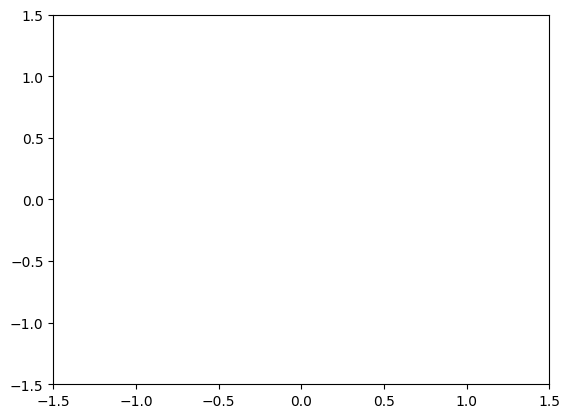

In [155]:

def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

fig, ax = plt.subplots()
def init():
  ax.clear()
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)

def Update(i):

    init()

    for j, p in enumerate(Orbitantes):

        r_over_time =p.GetPosition(scale)[i,0]
        theta_over_time = p.GetPosition(scale)[i,1]

        x, y = polar_to_cartesian(r_over_time, theta_over_time)
        ax.scatter(0,0,s=100,color='g')

        colors = ['r','k','b']
        ax.scatter(x,y,color=colors[j])

        circle = plt.Circle((x,y),0.05,color=colors[j],fill=True)
        ax.add_patch(circle)

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)
HTML(Animation.to_html5_video())